## Assignment 7: Xarray Fundamentals with Atmospheric Radiation Data

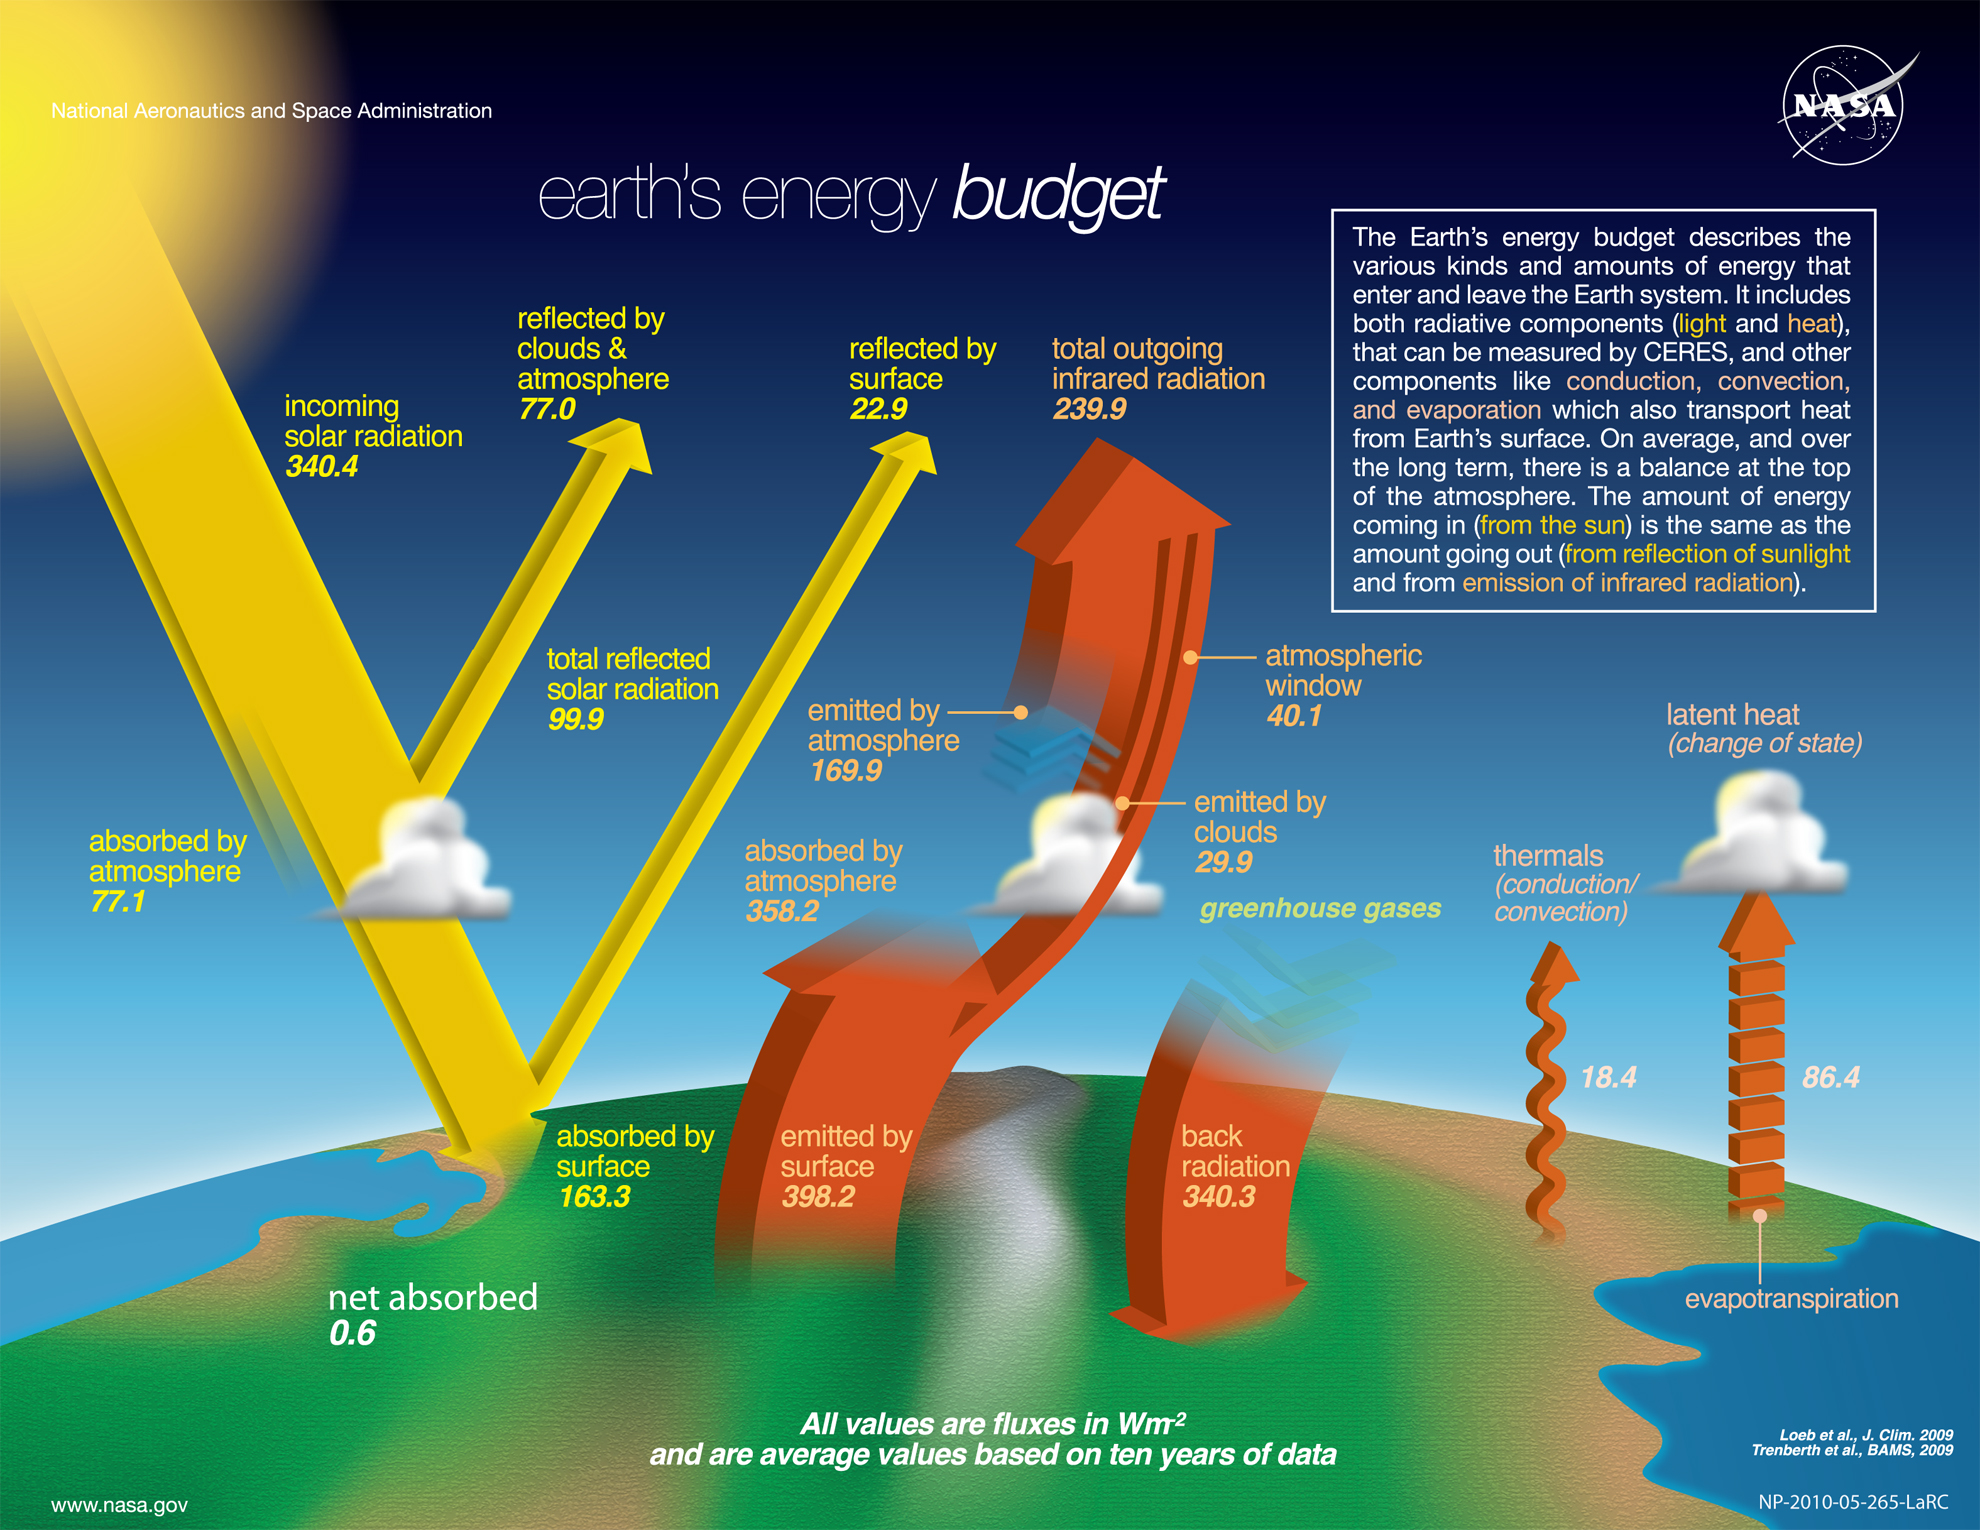

In [2]:
#Importing the packages for this assignment
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)
%config InlineBackend.figure_format = 'retina'

In [3]:
#Importing the dataset
import pooch
fname = pooch.retrieve(
    'http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc',
    known_hash='a876cc7106e7dcb1344fbec5dcd7510e5cd947e62049a8cbc188ad05ffe00345'
)
print(fname)

/home/jovyan/.cache/pooch/8e18cca34f0b893a1829cf86ad4b7c49-CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc


## 1) Opening data and examining metadata

### 1.1) Open the dataset and display its contents

In [4]:
ds = xr.open_dataset(fname)
ds

<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

### 1.2) Print out the long_name attribute of each variable
Print variable: long name for each variable. Format the output so that the start of the long name attributes are aligned.

In [5]:
# Create a for loop for listing each variable's long name
for i in list(ds.keys()):    
    print(i.ljust(28), ":", ds[i].attrs['long_name'])
#For single print(ds.toa_cre_lw_mon.attrs['long_name']

toa_sw_all_mon               : Top of The Atmosphere Shortwave Flux, Monthly Means, All-Sky conditions
toa_lw_all_mon               : Top of The Atmosphere Longwave Flux, Monthly Means, All-Sky conditions
toa_net_all_mon              : Top of The Atmosphere Net Flux, Monthly Means, All-Sky conditions
toa_sw_clr_mon               : Top of The Atmosphere Shortwave Flux, Monthly Means, Clear-Sky conditions
toa_lw_clr_mon               : Top of The Atmosphere Longwave Flux, Monthly Means, Clear-Sky conditions
toa_net_clr_mon              : Top of The Atmosphere Net Flux, Monthly Means, Clear-Sky conditions
toa_cre_sw_mon               : Top of The Atmosphere Cloud Radiative Effects Shortwave Flux, Monthly Means
toa_cre_lw_mon               : Top of The Atmosphere Cloud Radiative Effects Longwave Flux, Monthly Means
toa_cre_net_mon              : Top of The Atmosphere Cloud Radiative Effects Net Flux, Monthly Means
solar_mon                    : Incoming Solar Flux, Monthly Means
cldarea_to

## 2) Basic reductions, arithmetic, and plotting

### 2.1) Calculate the time-mean of the entire dataset
Note the sign conventions on each variable.

In [6]:
#Meaning across time 
time_mean = ds.mean(dim=('time'), keep_attrs = True)
time_mean #This dataset is two dimensional instead of the original 3d of ds 

<xarray.Dataset>
Dimensions:                      (lon: 360, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (lat, lon) float32 122.3 122.3 ... 104.4 104.4
    toa_lw_all_mon               (lat, lon) float32 141.1 141.1 ... 194.1 194.1
    toa_net_all_mon              (lat, lon) float32 -91.29 -91.29 ... -126.3
    toa_sw_clr_mon               (lat, lon) float32 119.9 119.9 ... 89.47 89.47
    toa_lw_clr_mon               (lat, lon) float32 140.2 140.2 ... 200.4 200.4
    toa_net_clr_mon              (lat, lon) float32 -88.03 -88.03 ... -117.6
    ...                           ...
    toa_cre_net_mon              (lat, lon) float32 -3.253 -3.251 ... -8.651
    solar_mon                    (lat, lon) float32 172.1 172.1 ... 172.3 172.3
    cldarea_total_daynight_mon   (lat, lon) float32 51.52 51.52 ... 78.93 78.93
    cldpress_total_daynight_mon  (lat, lon) float32 486.5 486.5 ... 766.9 766.9
    cldtemp_total_daynight_mon   (lat, lon) float32 225.2 225.2 ... 247.9 247.9
    cldtau_total_day_mon         (lat, lon) float32 4.158 4.158 ... 4.821 4.821
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

### 2.2) From this, make a 2D plot of the the time-mean Top of Atmosphere (TOA) Longwave, Shortwave, and Incoming Solar Radiation
(Use “All-Sky” conditions)

In [7]:
#Viewing all the units for the dataset
for i in list(ds.keys()):    
    print(i.ljust(28), ":", ds[i].attrs['units'])

toa_sw_all_mon               : W m-2
toa_lw_all_mon               : W m-2
toa_net_all_mon              : W m-2
toa_sw_clr_mon               : W m-2
toa_lw_clr_mon               : W m-2
toa_net_clr_mon              : W m-2
toa_cre_sw_mon               : W m-2
toa_cre_lw_mon               : W m-2
toa_cre_net_mon              : W m-2
solar_mon                    : W m-2
cldarea_total_daynight_mon   : percent
cldpress_total_daynight_mon  : hPa
cldtemp_total_daynight_mon   : K
cldtau_total_day_mon         : dimensionless


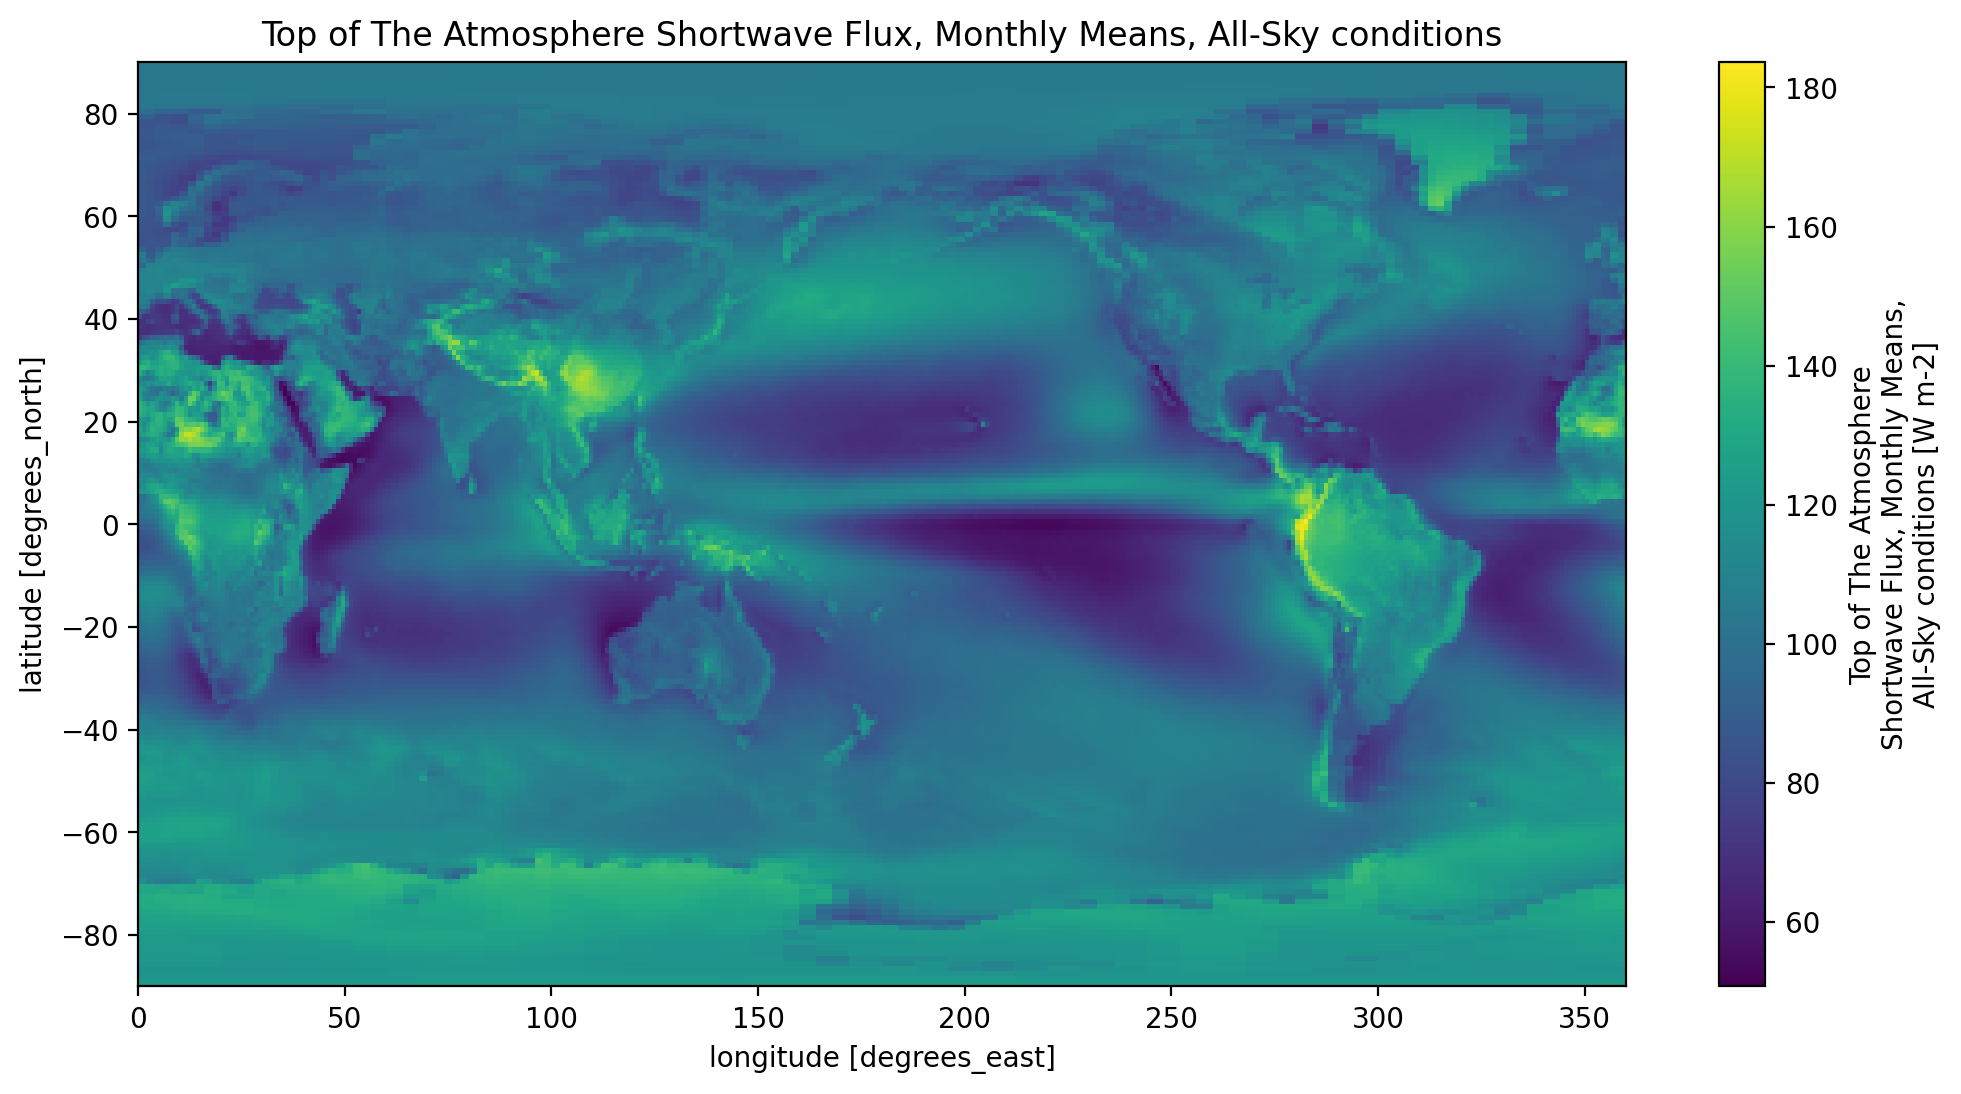

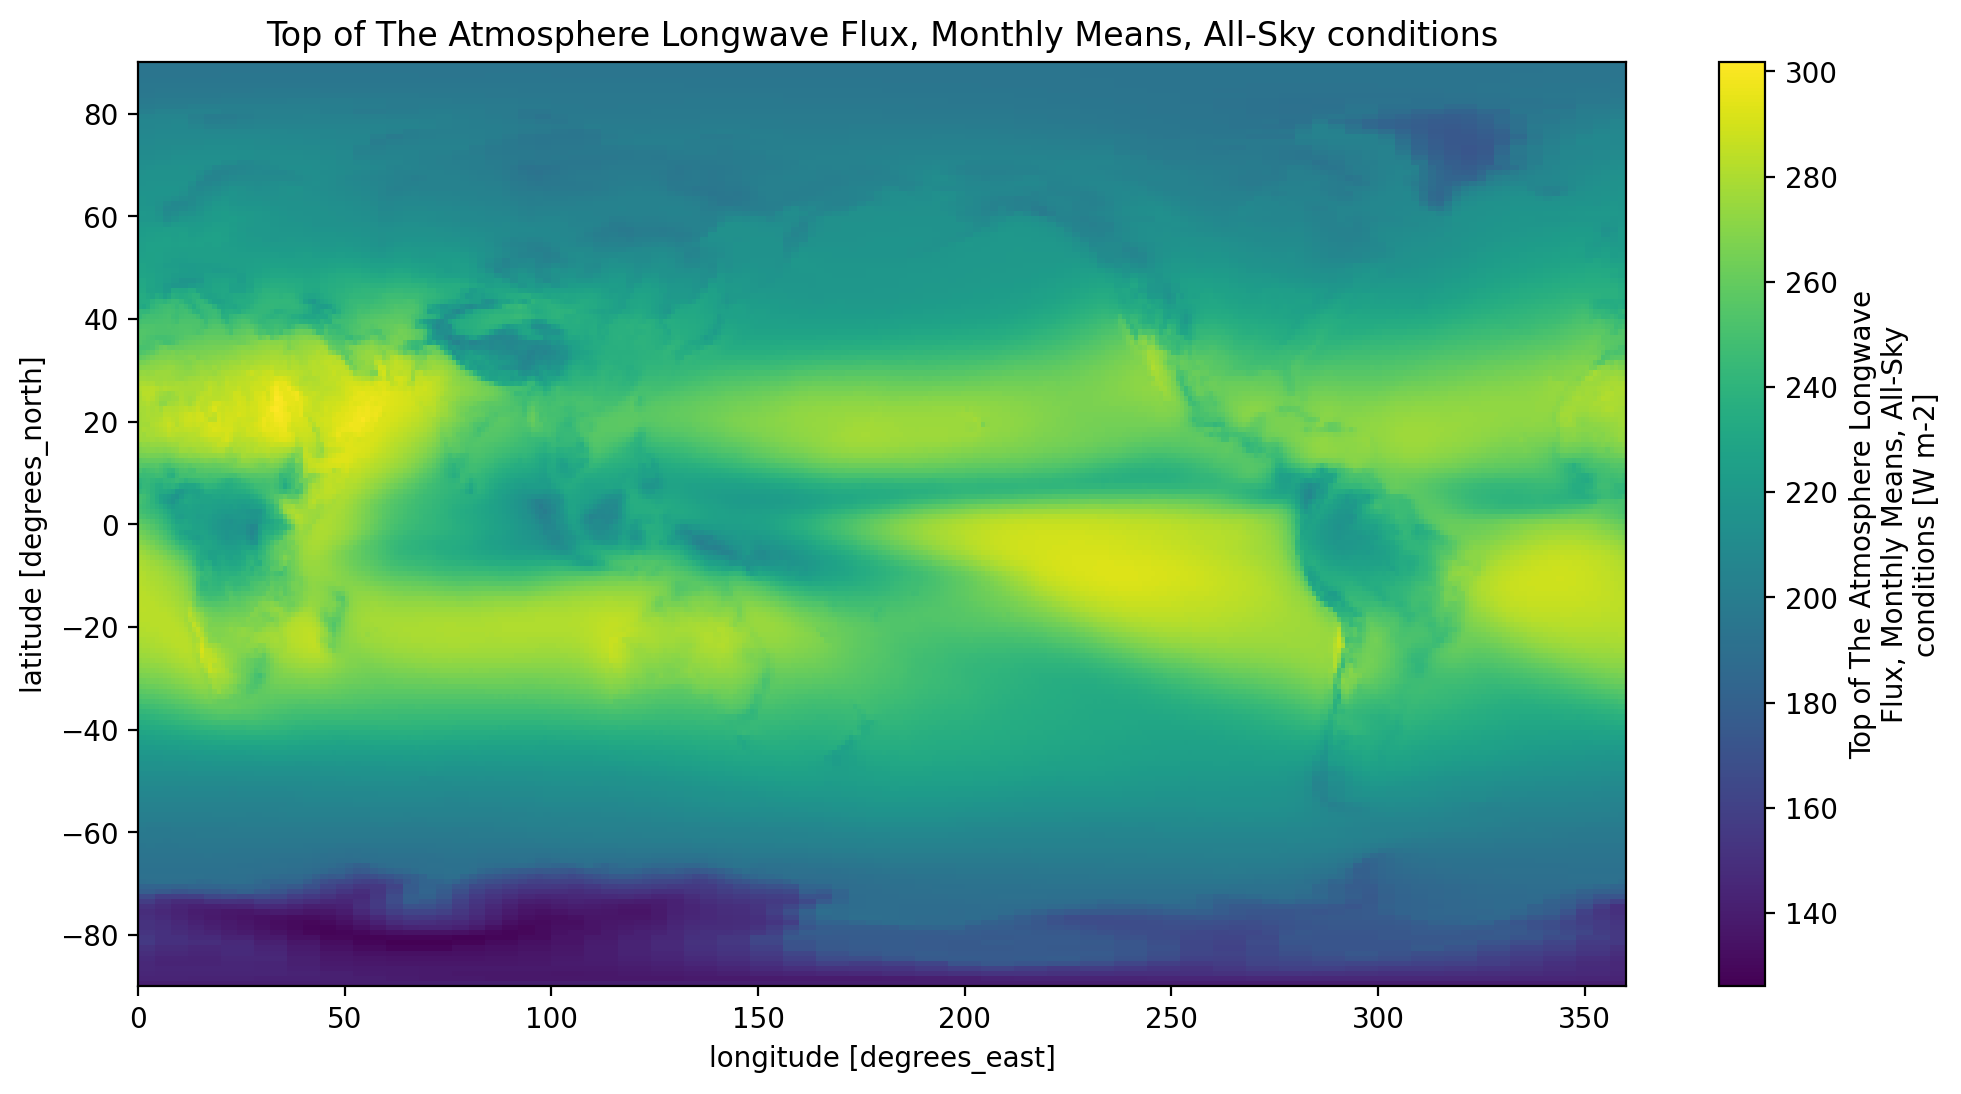

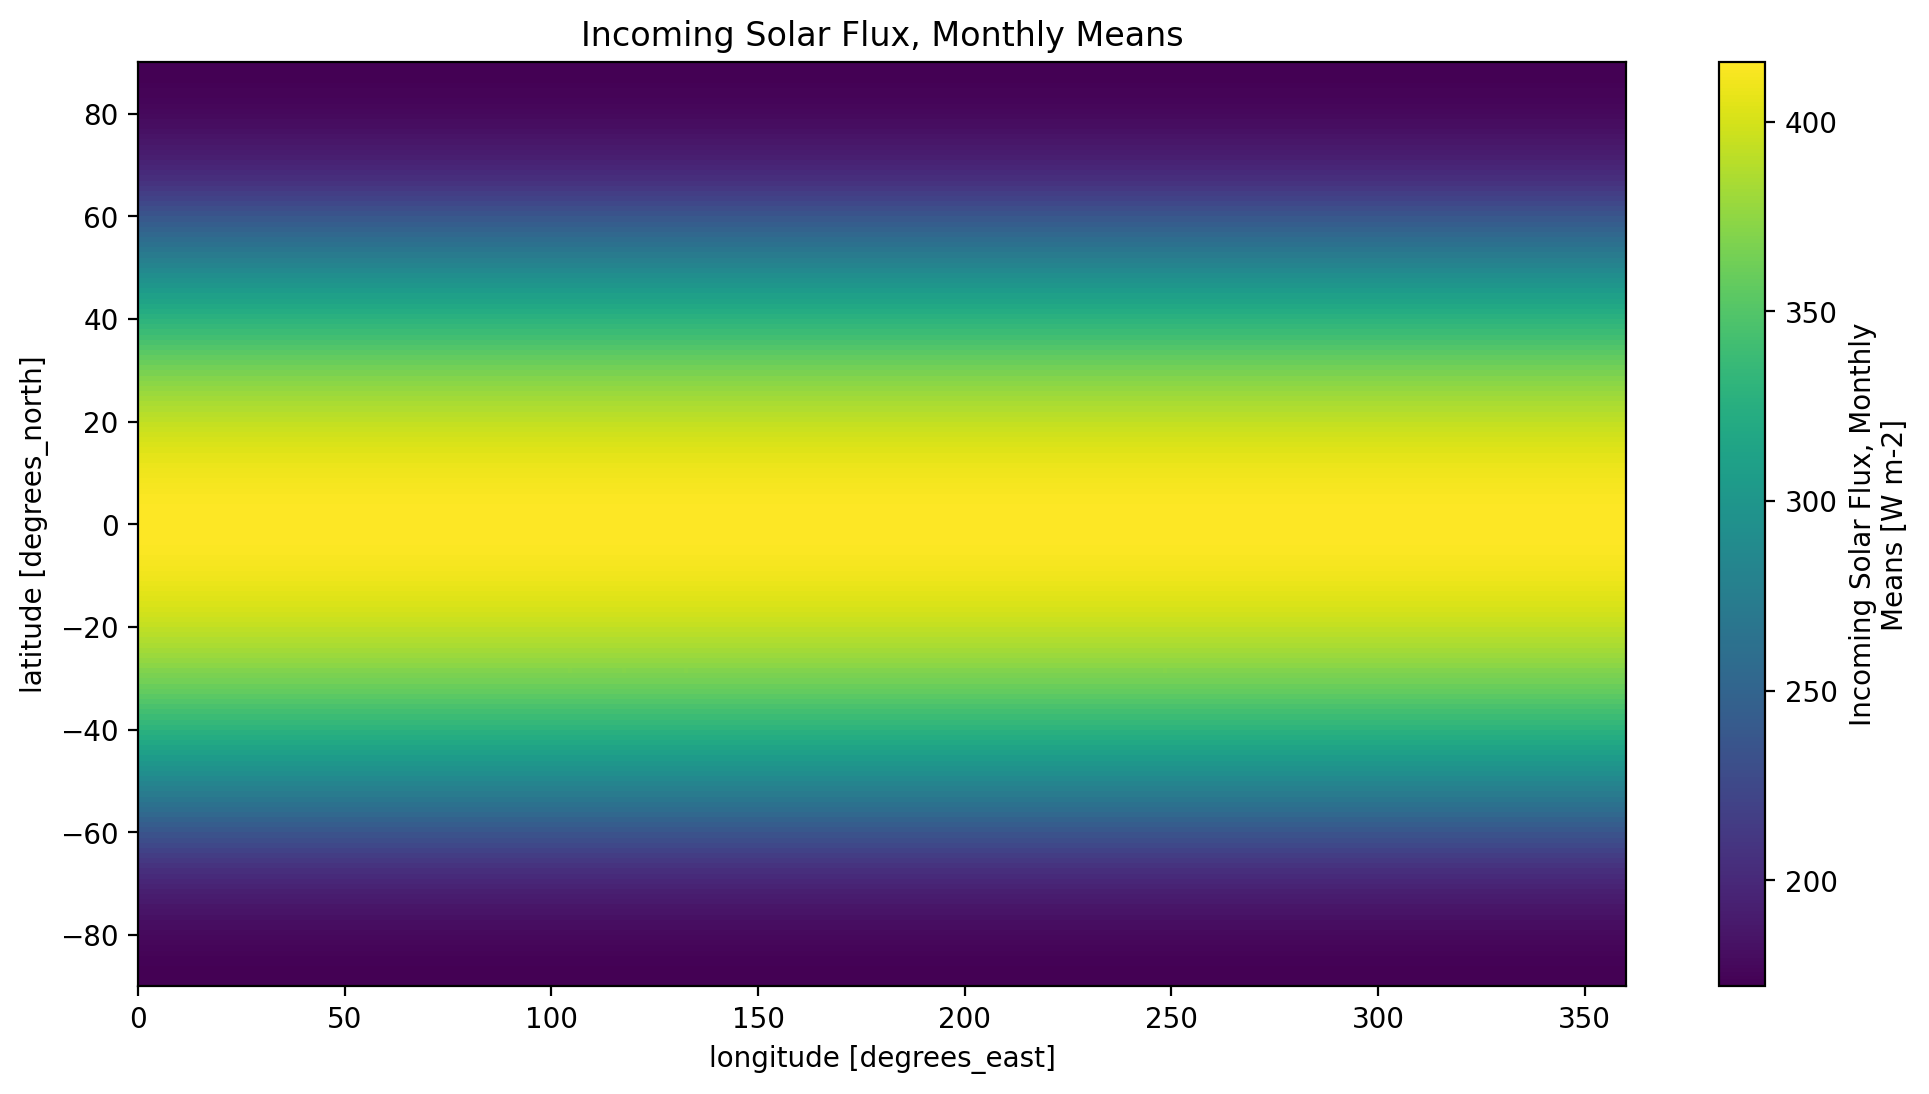

In [53]:
var = [time_mean.toa_sw_all_mon, time_mean.toa_lw_all_mon, time_mean.solar_mon]
for i in range(3): 
    var[i].plot()
    plt.title(var[i].attrs['long_name'])
    plt.show()

## 2.3) Add up the three variables above and verify (visually) that they are equivalent to the TOA net flux
You have to pay attention to and think carefully about the sign conventions (positive or negative) for each variable in order for the variables to sum to the right TOA net flux. Refer to the NASA figure at the top of the page to understand incoming and outgoing radiation.


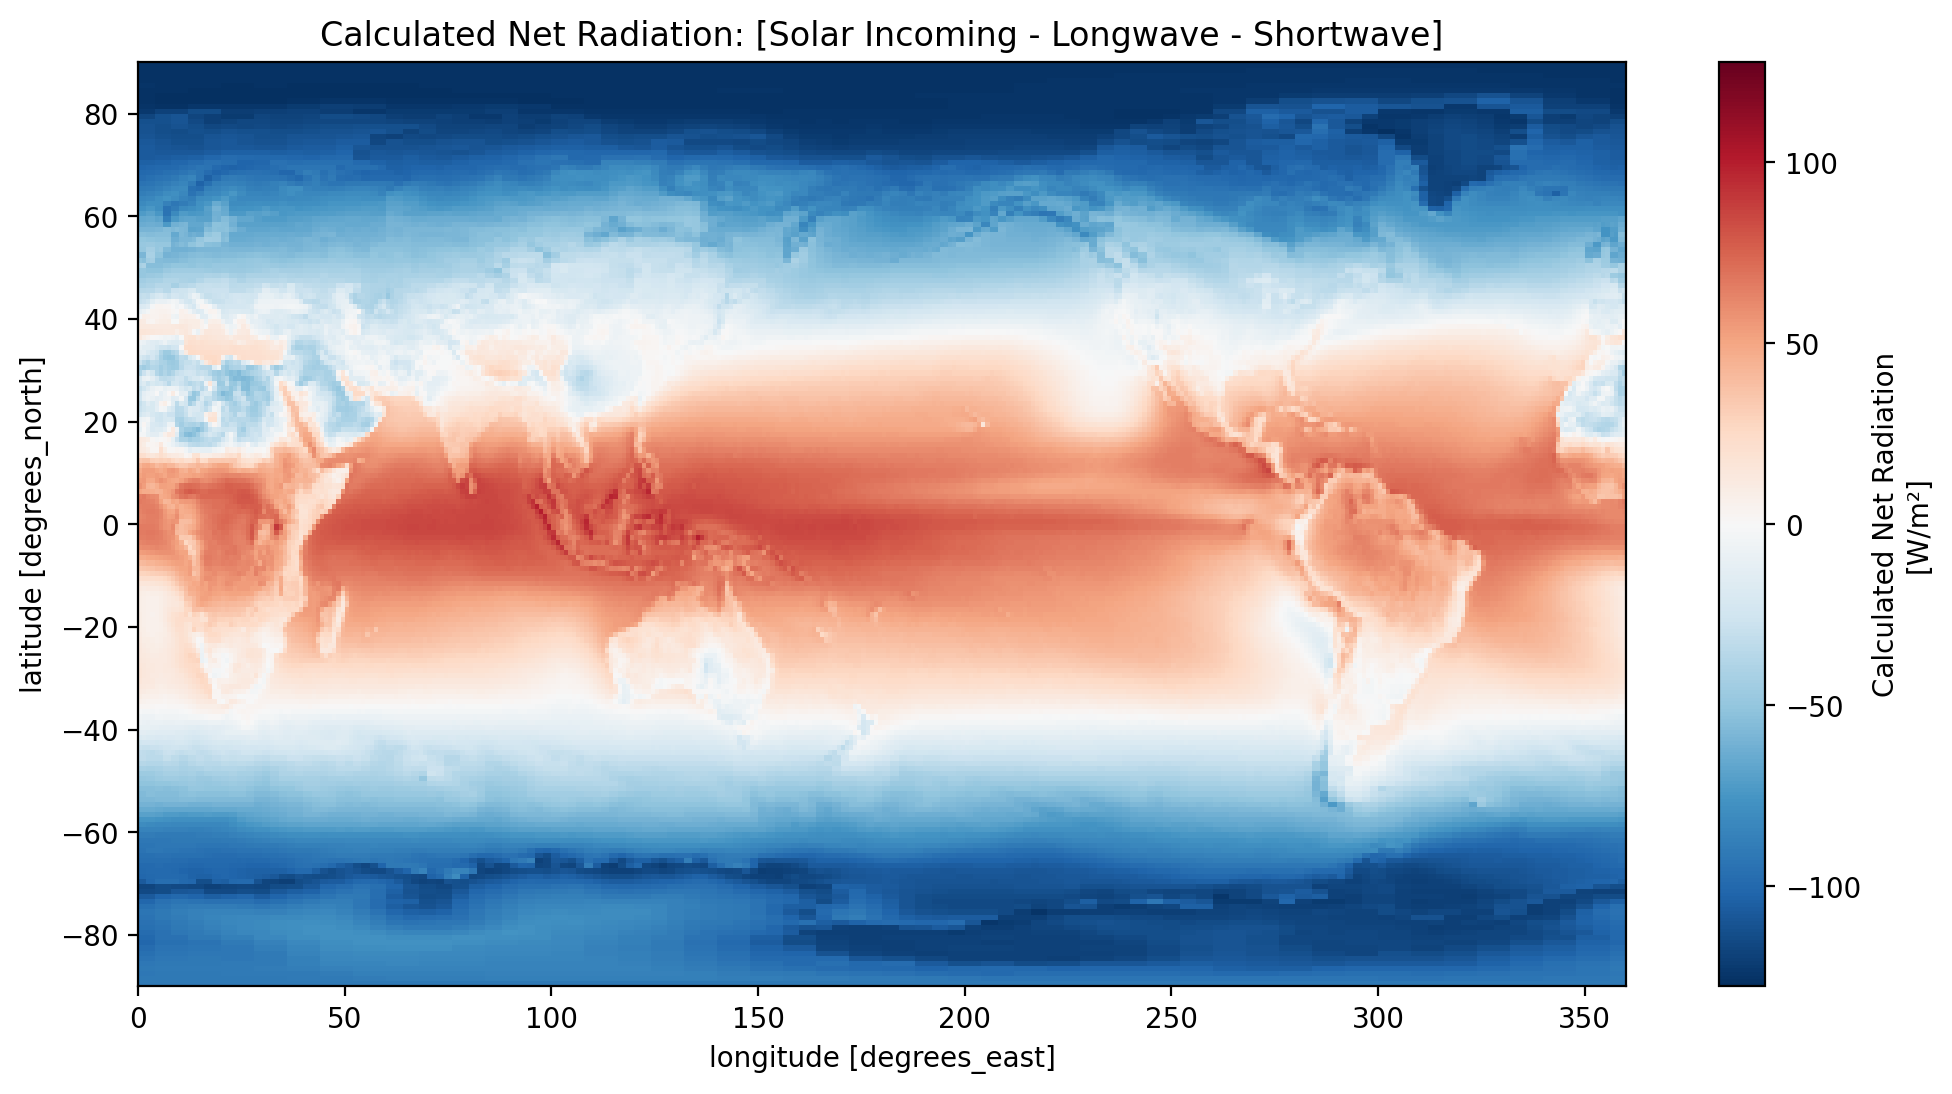

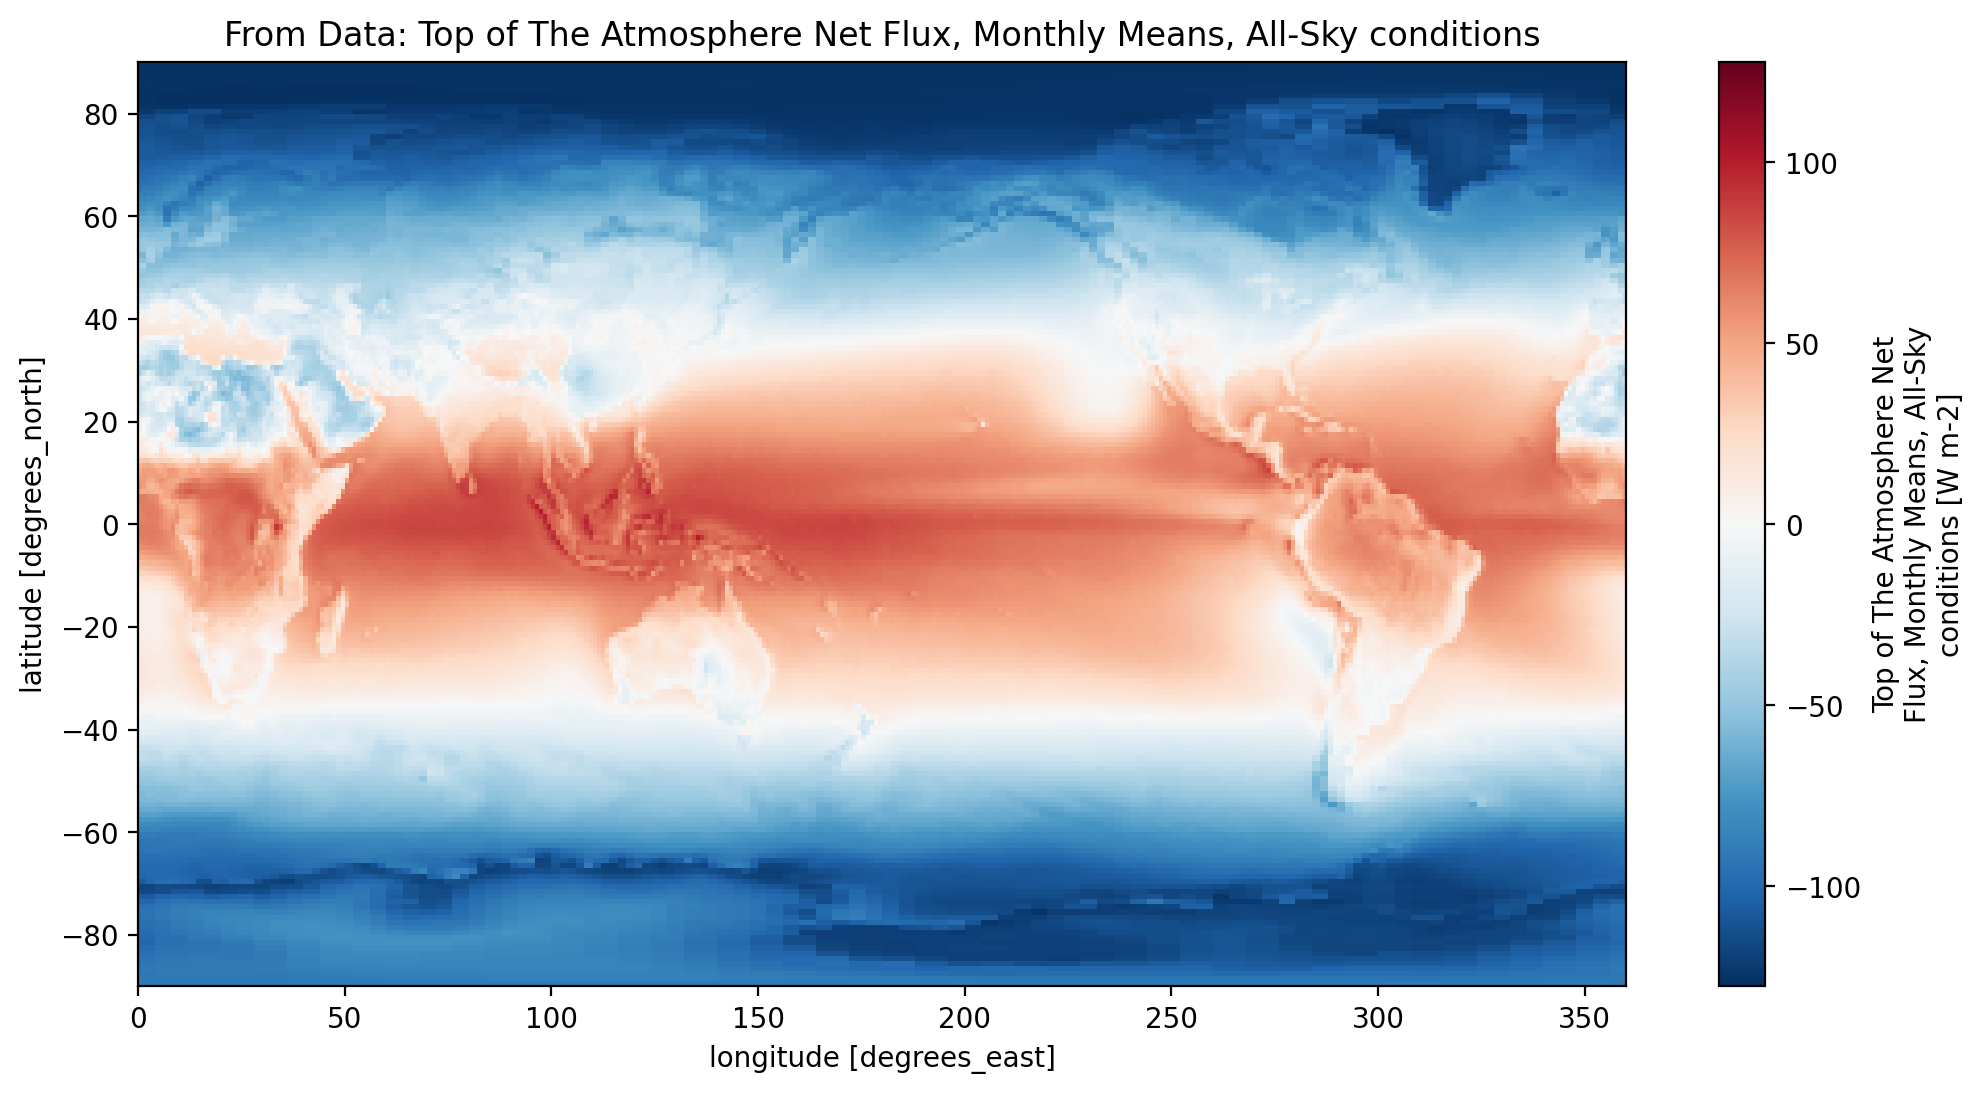

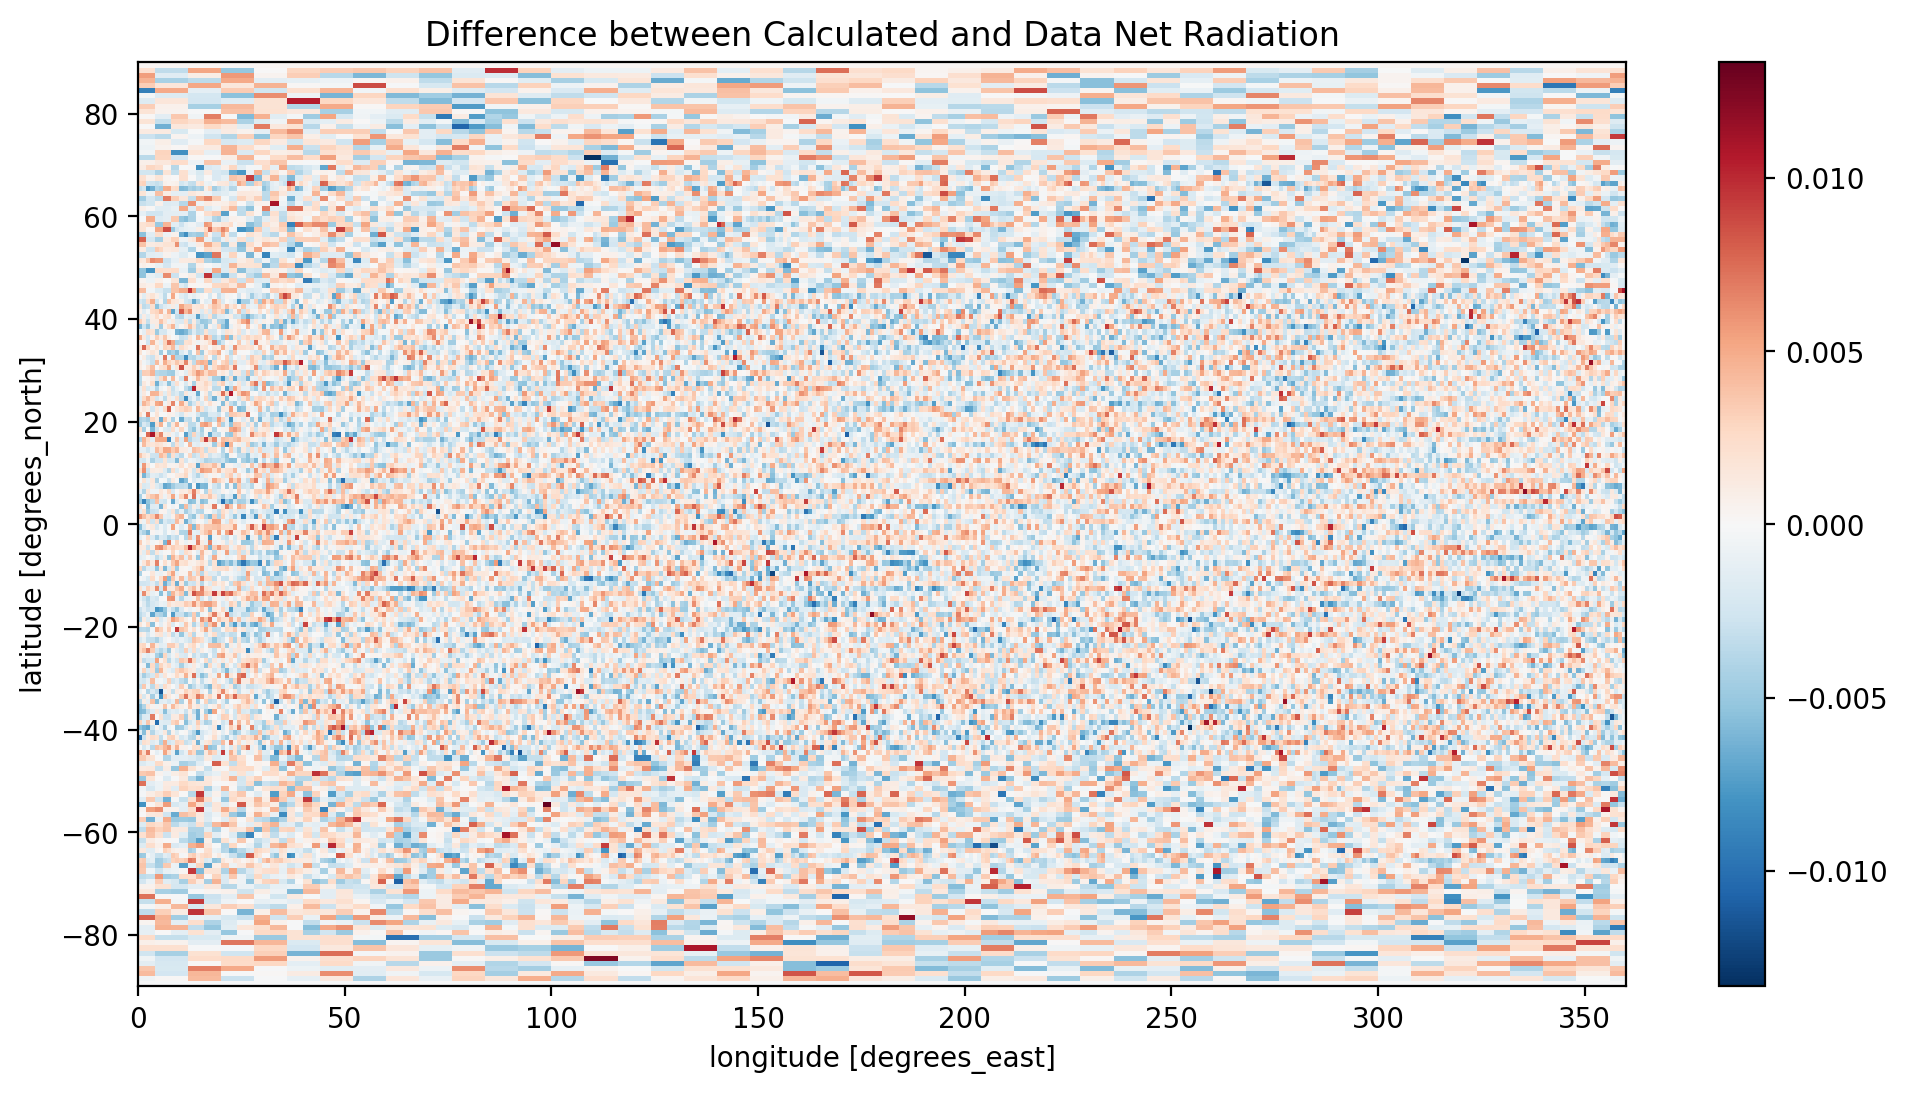

In [ ]:
#Plotting the Calculated Net Radiation
TOA_net = time_mean.solar_mon - time_mean.toa_lw_all_mon - time_mean.toa_sw_all_mon
TOA_net.attrs['units'] = unit
TOA_net.attrs['long_name'] = "Calculated Net Radiation"
TOA_net.plot()
plt.title(TOA_net.attrs['long_name'] + ": [Solar Incoming - Longwave - Shortwave]")
plt.show()

#Plotting the Data Net Radiation
time_mean.toa_net_all_mon.plot()
plt.title("From Data: " + time_mean.toa_net_all_mon.attrs['long_name'])
plt.show()

#Plotting the difference
difference = TOA_net - time_mean.toa_net_all_mon
difference.plot()
plt.title('Difference between Calculated and Data Net Radiation')
plt.show()

## 3) Mean and weighted mean

### 3.1) Calculate the global (unweighted) mean of TOA net radiation
Since the Earth is approximately in radiative balance, the net TOA radiation should be zero. But taking the naive mean from this dataset, you should find a number far from zero. Why? ANSWER THIS!!!!!!!

The answer is that each “pixel” or “grid point” of this dataset does not represent an equal area of Earth’s surface. So naively taking the mean, i.e. giving equal weight to each point, gives the wrong answer.

On a lat / lon grid, the relative area of each grid point is proportional to cos(𝜆). (𝜆 is latitude)

In [11]:
naive_mean = TOA_net.mean(dim=('lat', 'lon'))
print("Global (unweighted) mean of TOA net radiation =", naive_mean.values, unit)

Global (unweighted) mean of TOA net radiation = -28.728985 W/m²


## 3.2) Create a weight array proportional to cos(𝜆)
Think carefully a about radians vs. degrees

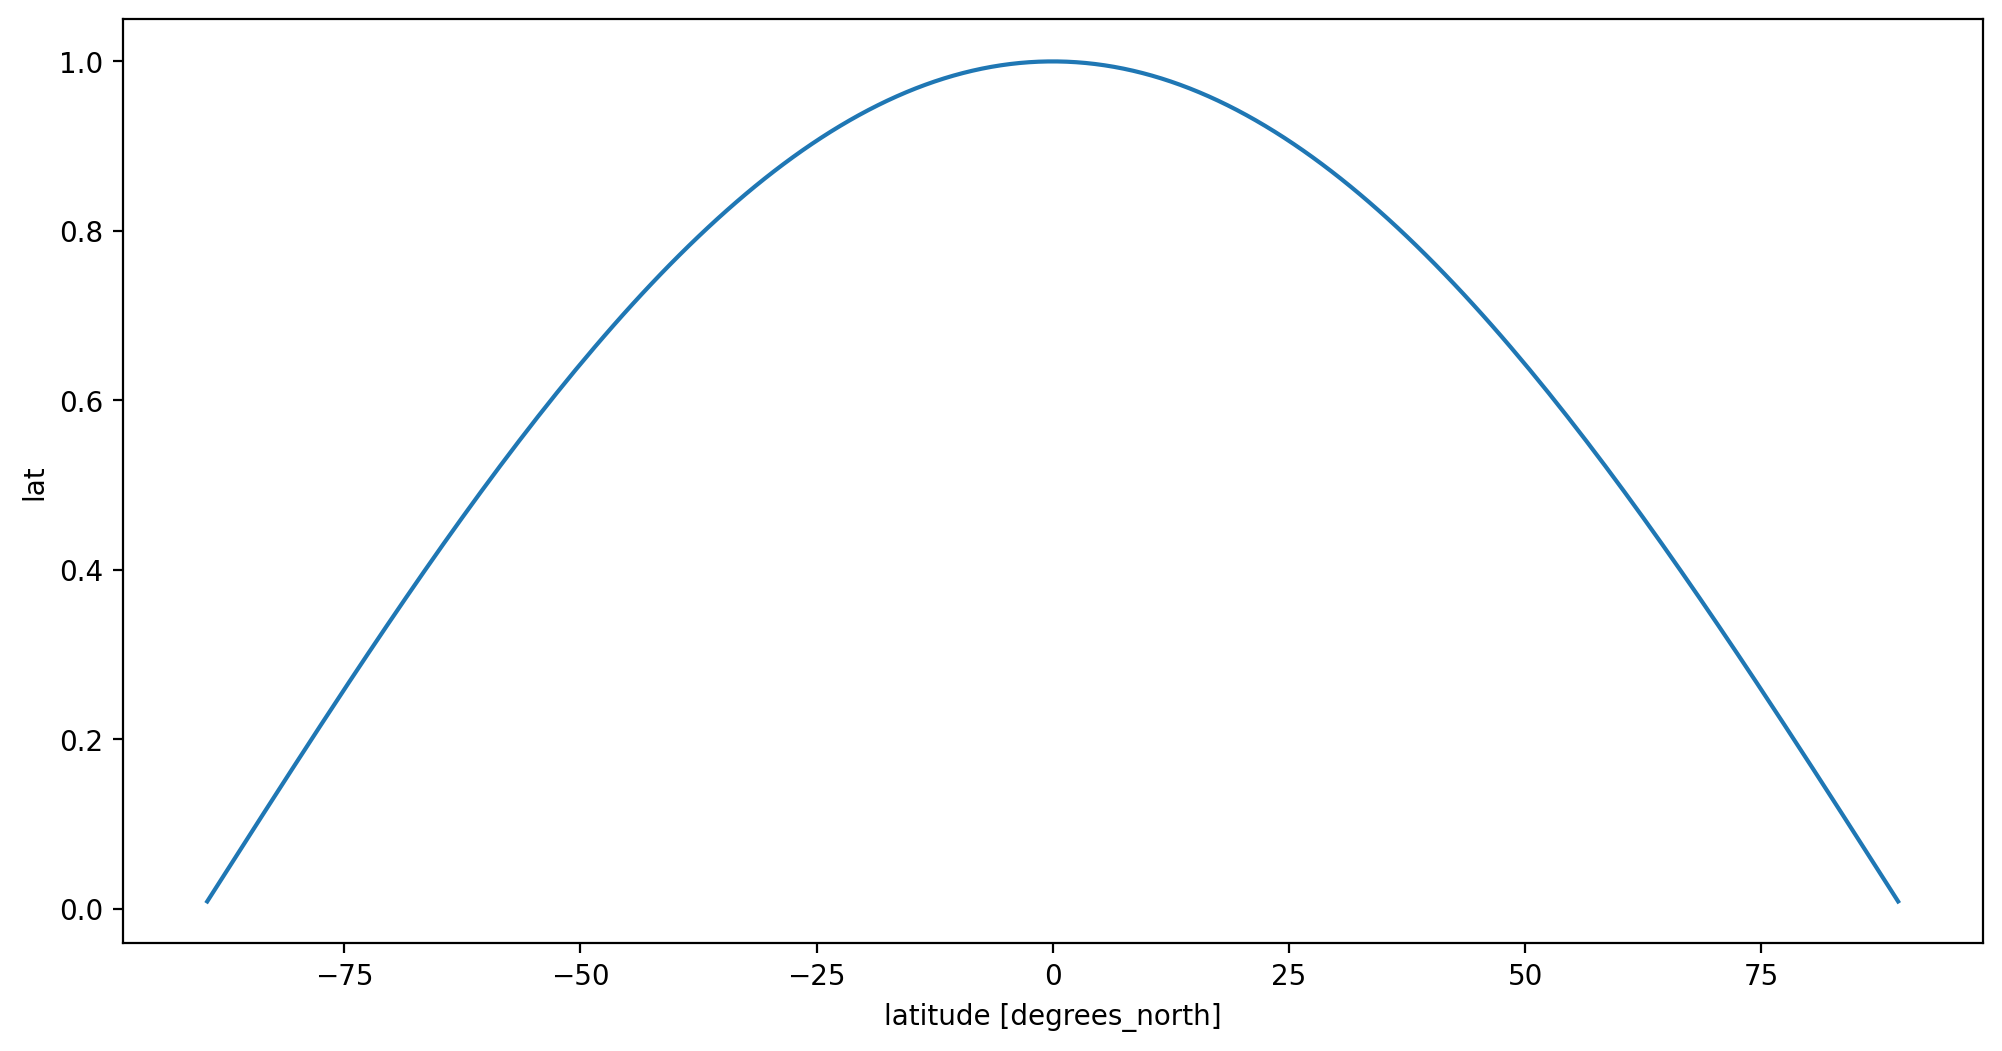

In [65]:
#Calculating the weight using latitude
weight = np.cos(ds.lat * np.pi / 180)
weight.plot()
plt.show()

### 3.3) Redo your global mean TOA net radiation calculation with this weight factor
Use xarray’s weighted array reductions to compute the weighted mean.

This time around, you should have found something much closer to zero. Ask a climate scientist what the net energy imbalance of Earth due to global warming is estimated to be. Do you think our calculation is precise enough to detect this?

In [68]:
weighted_rad = TOA_net.weighted(weight)
print("Global mean TOA net radiation calculation with this weight factor =", weighted_rad.mean())

Global mean TOA net radiation calculation with this weight factor = <xarray.DataArray ()>
array(0.87810009)


### 3.4) Now that you have a weight factor, verify that the TOA incoming solar, outgoing longwave, and outgoing shortwave approximately match up with infographic shown in the first cell of this assignment. 

In [14]:
# Weighted Solar Incoming Radiation
weighted_SI = time_mean.solar_mon.weighted(weight).mean()

# Weighted Top of Atmosphere (TOA) Shortwave
weighted_SW = time_mean.toa_sw_all_mon.weighted(weight).mean()

# Weighted Top of Atmosphere (TOA) Shortwave
weighted_LW = time_mean.toa_lw_all_mon.weighted(weight).mean()


print("Total Incoming Solar Radiation SR =", weighted_SI.values)
print("Total Reflected Solar Radiation SW =", weighted_SW.values)
print("Total Outgoing Infrared Radiation LW =", weighted_LW.values)

Total Incoming Solar Radiation SR = 340.28355233050684
Total Reflected Solar Radiation SW = 99.13858942331191
Total Outgoing Infrared Radiation LW = 240.26666558090503


## 4) Meridional Heat Transport Calculation
We can go beyond a weight factor and actually calculate the area of each pixel of the dataset, using the formula

𝑑𝐴=𝑅2cos(𝜆)𝑑𝜆𝑑𝜑

where 𝑑𝜆 and 𝑑𝜑 are the spacing of the points in latitude and longitude (measured in radians). We can approximate Earth’s radius as 𝑅=6,371 km.

### 4.1) calculate the pixel area using this formula and create a 2D (lon, lat) DataArray for it
(Xarray’s ones_like function can help you easily create and broadcast DataArrays.) Verify that the sum of all the pixels equals the Earth’s true surface area as evaluated using the formula for the area of a sphere (yes, the Earth is not a sphere … it’s just a homework problem).

In [25]:
#Calculated Area
R = 6371 * 1000 # Radius of the Earth in km * 1000 = m
Earth_SA = (4 * np.pi) * (R ** 2)
Earth_SA
#Calculated the Pixel Area 
# since weight = np.cos(ds.lat * np.pi / 180)
dy = 1 * np.pi / 180 # 1 step intervals for latitude in radian
dp = 1 * np.pi / 180 # 1 step intervals for longitude in radian
Pixel_SA = R ** 2 * weight * dy * dp * xr.ones_like(time_mean.toa_lw_all_mon)
print("Earth's Surface area approximated as a sphere", round(Earth_SA, 1))
print("Pixel Area Summation from Data", np.round(Pixel_SA.sum().values))
#DIFFERENCE

Earth's Surface area approximated as a sphere 510064471909788.2
Pixel Area Summation from Data 510070932309457.0


### 4.2) Calculate and plot the total amount of net radiation in each 1-degree latitude band
Multiplying the pixel area (m2) from above with the radiative flux (W m−2) gives you the total amount of radiation absorbed in each pixel in W.
Label with correct units.

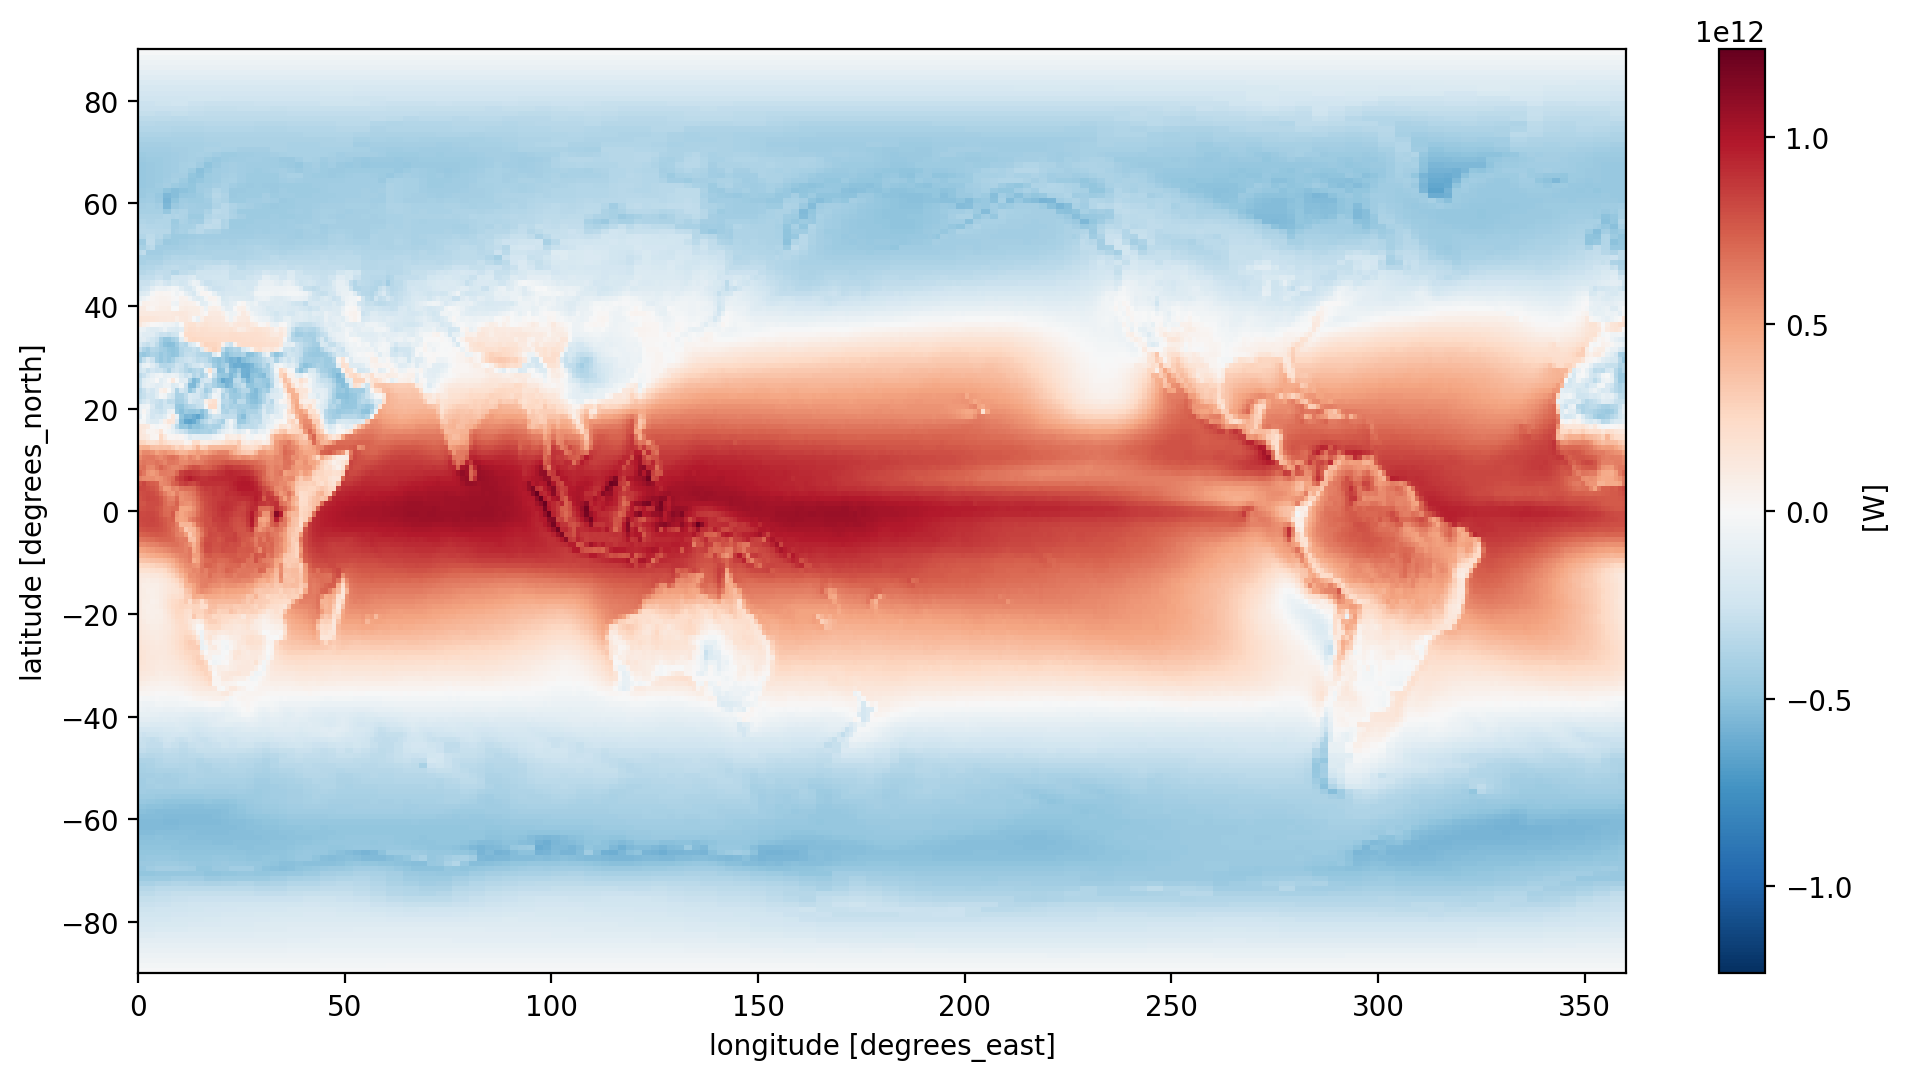

In [72]:
net_rad = time_mean.toa_net_all_mon * Pixel_SA
net_rad.attrs['units'] = "W"
net_rad.plot()
plt.show()

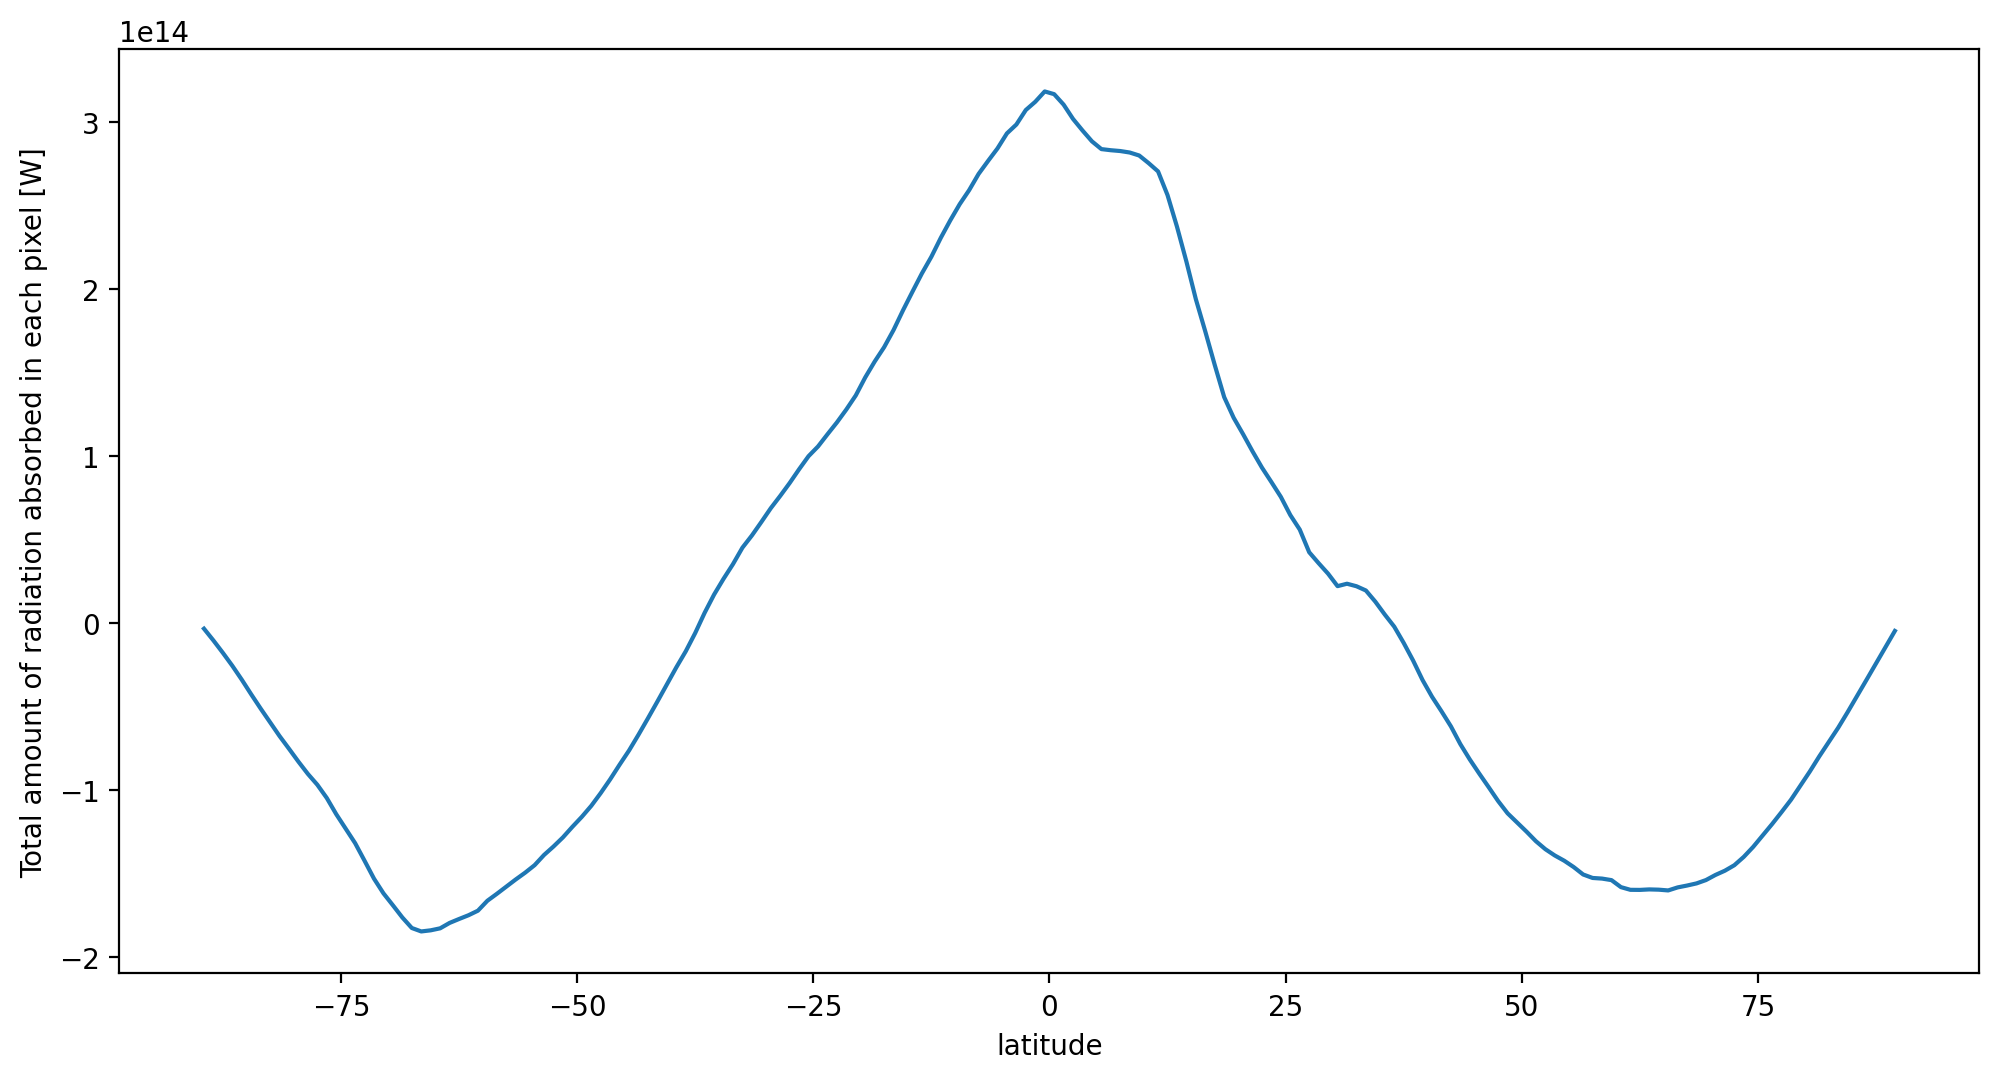

In [73]:
# rad_abs = ds.toa_cre_net_mon * Pixel_SA
net_rad_sum = (net_rad.sum(dim = "lon"))
plt.plot(net_rad_sum.lat, net_rad_sum)
plt.xlabel("latitude")
plt.ylabel("Total amount of radiation absorbed in each pixel [W]")
plt.show()

### 4.3) Plot the cumulative sum of the total amount of net radiation as a function of latitude
Label with correct units. (Hint: check out xarray’s cumsum function.)
This curve tells you how much energy must be transported meridionally by the ocean and atmosphere in order to account for the radiative imbalance at the top of the atmosphere.
You should get a curve that looks something like this: https://journals.ametsoc.org/view/journals/clim/14/16/full-i1520-0442-14-16-3433-f07.gif (Figure from Trenberth & Caron, 2001)

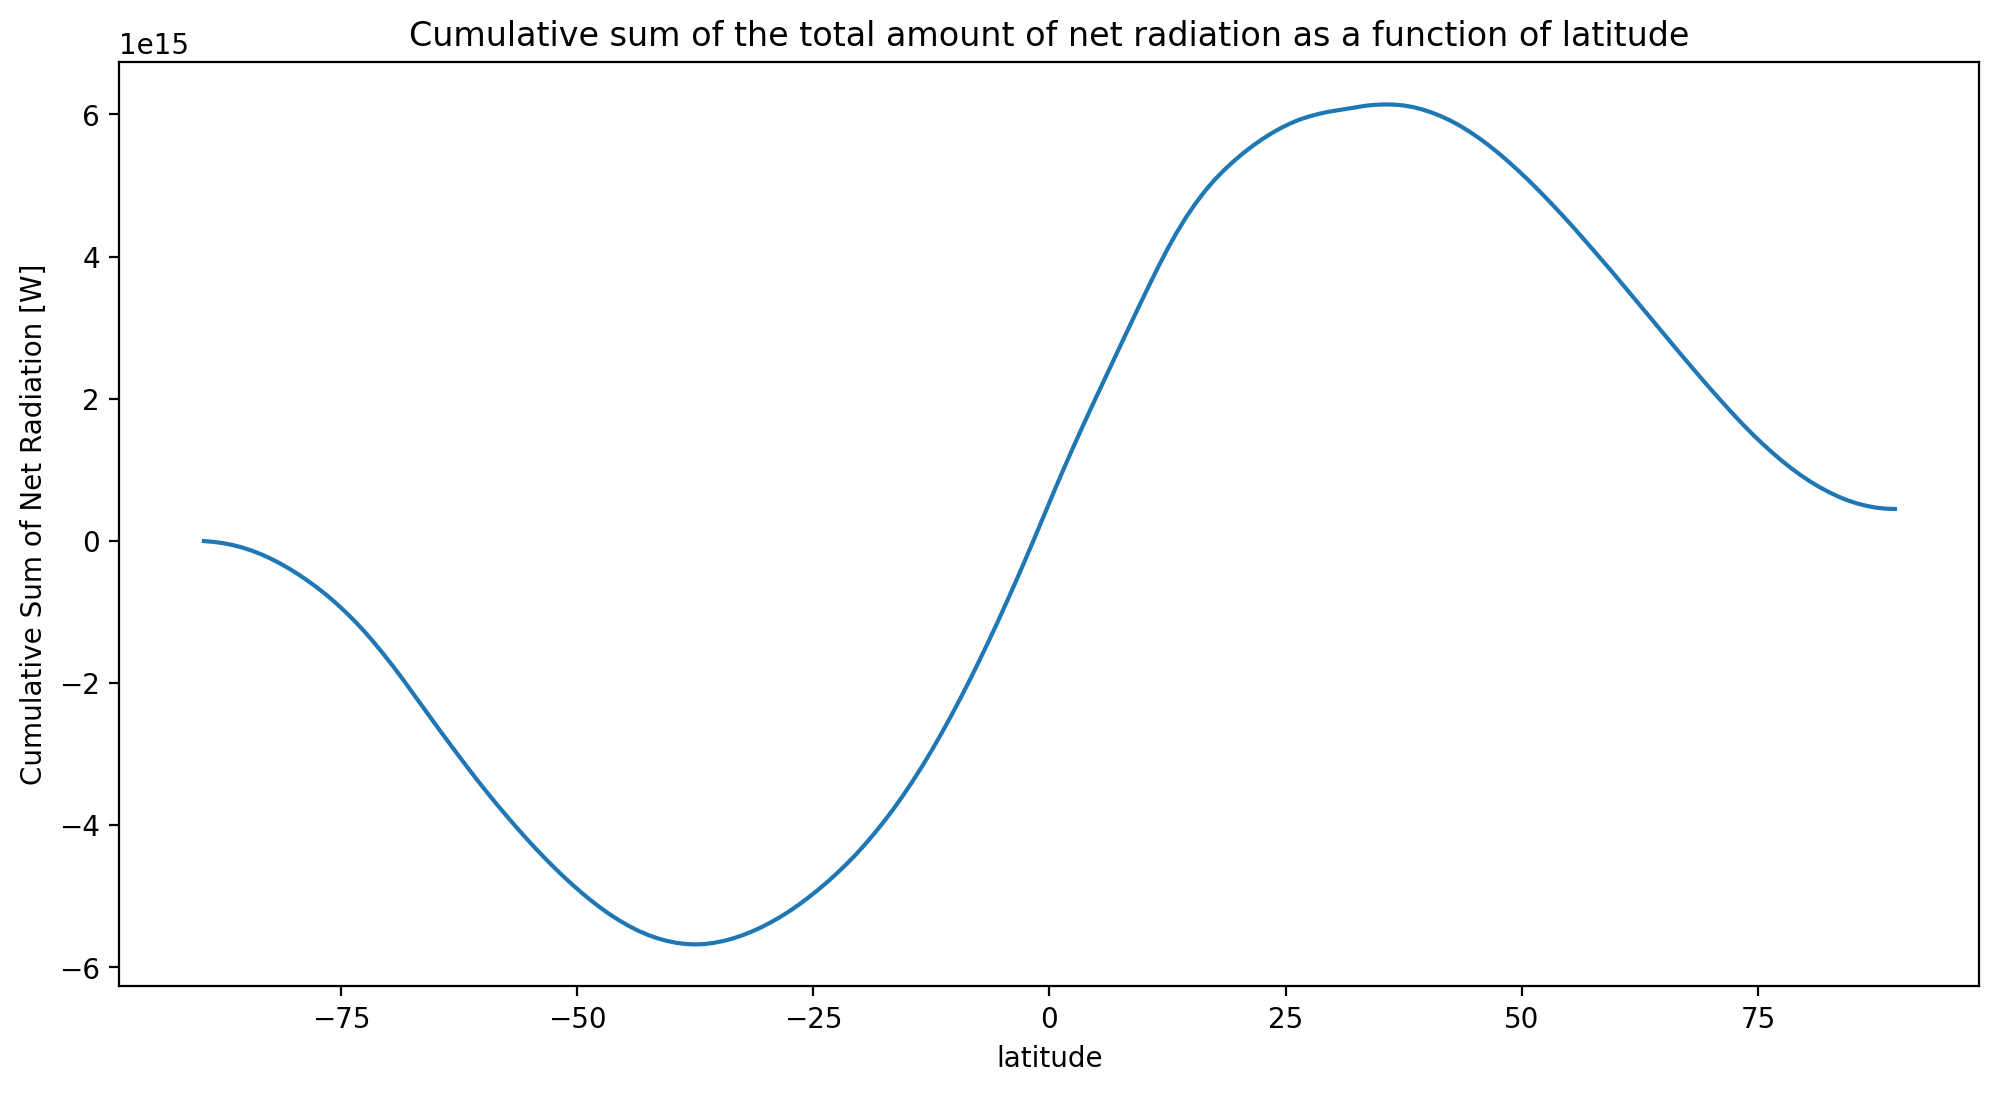

In [76]:
net_rad_cumsum = net_rad_sum.cumsum(dim = 'lat')
net_rad_cumsum.plot()
plt.xlabel("latitude")
plt.ylabel("Cumulative Sum of Net Radiation [W]")
plt.title("Cumulative sum of the total amount of net radiation as a function of latitude")
plt.show()

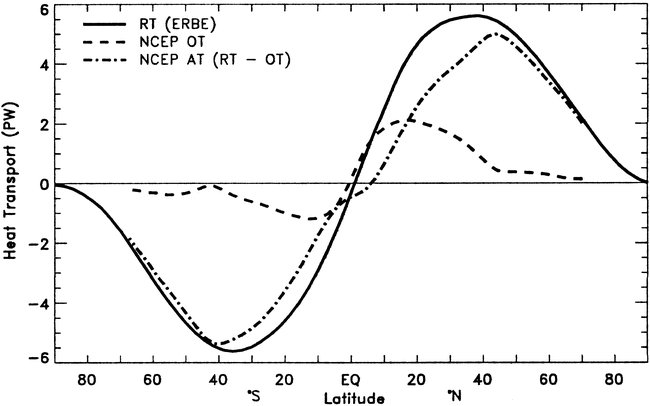

### 5) Selecting and Merging Data
For the next problem, use the following approximate locations of four different cities.
city

### 5.1) Create a Dataset for each point from the global dataset
Each city should get its own Dataset with the same variables as the one you imported. Find the nearest associated incoming solar radiation and net radiation timeseries at each city.

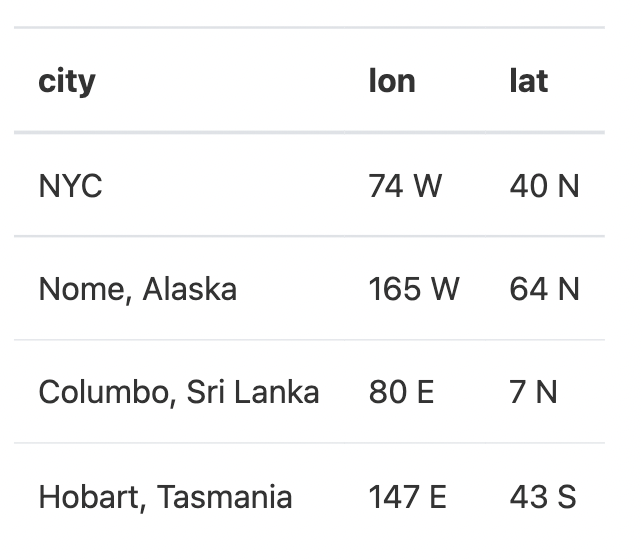

In [46]:
#City Dataset
#Find the value of the lat and lon using the nearest function 
nyc = ds.sel(lat = 40, lon = 360-70, method="nearest")
alk = ds.sel(lat = 64, lon = 360-165, method="nearest")
sri = ds.sel(lat = 7, lon = 80, method="nearest")
tas = ds.sel(lat = -43, lon = 147, method="nearest")

cities = [nyc, alk, sri, tas]

## 5.2) Merge these four datasets into a new dataset with the new dimension city
Create a new dimension coordinate to hold the city name. Display the merged dataset.

In [38]:
merged = xr.concat([nyc, alk, sri, tas], dim = 'city')
merged['city'] = ["New York City, New York", "Nome, Alaska", "Columbo, Sri Lanka", "Hobart, Tasmania"]
merged

<xarray.Dataset>
Dimensions:                      (city: 4, time: 203)
Coordinates:
    lon                          (city) float32 290.5 195.5 80.5 147.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
    lat                          (city) float32 40.5 64.5 7.5 -42.5
  * city                         (city) <U23 'New York City, New York' ... 'H...
Data variables: (12/14)
    toa_sw_all_mon               (city, time) float32 90.39 156.1 ... 137.6
    toa_lw_all_mon               (city, time) float32 225.8 215.3 ... 259.2
    toa_net_all_mon              (city, time) float32 5.188 31.16 ... 97.02
    toa_sw_clr_mon               (city, time) float32 39.72 40.71 ... 75.11
    toa_lw_clr_mon               (city, time) float32 250.5 254.7 ... 284.6
    toa_net_clr_mon              (city, time) float32 31.09 107.2 ... 134.2
    ...                           ...
    toa_cre_net_mon              (city, time) float32 -25.9 -76.07 ... -37.13
    solar_mon                    (city, time) float32 321.3 402.6 ... 493.8
    cldarea_total_daynight_mon   (city, time) float32 71.69 81.25 ... 46.37
    cldpress_total_daynight_mon  (city, time) float32 670.5 613.6 ... 641.1
    cldtemp_total_daynight_mon   (city, time) float32 257.0 255.1 ... 265.2
    cldtau_total_day_mon         (city, time) float32 6.321 11.62 ... 6.653
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

### 5.3) Plot the incoming solar and net radiation at each city
Make two separate plots. Try to have your legend created automatically from the data.

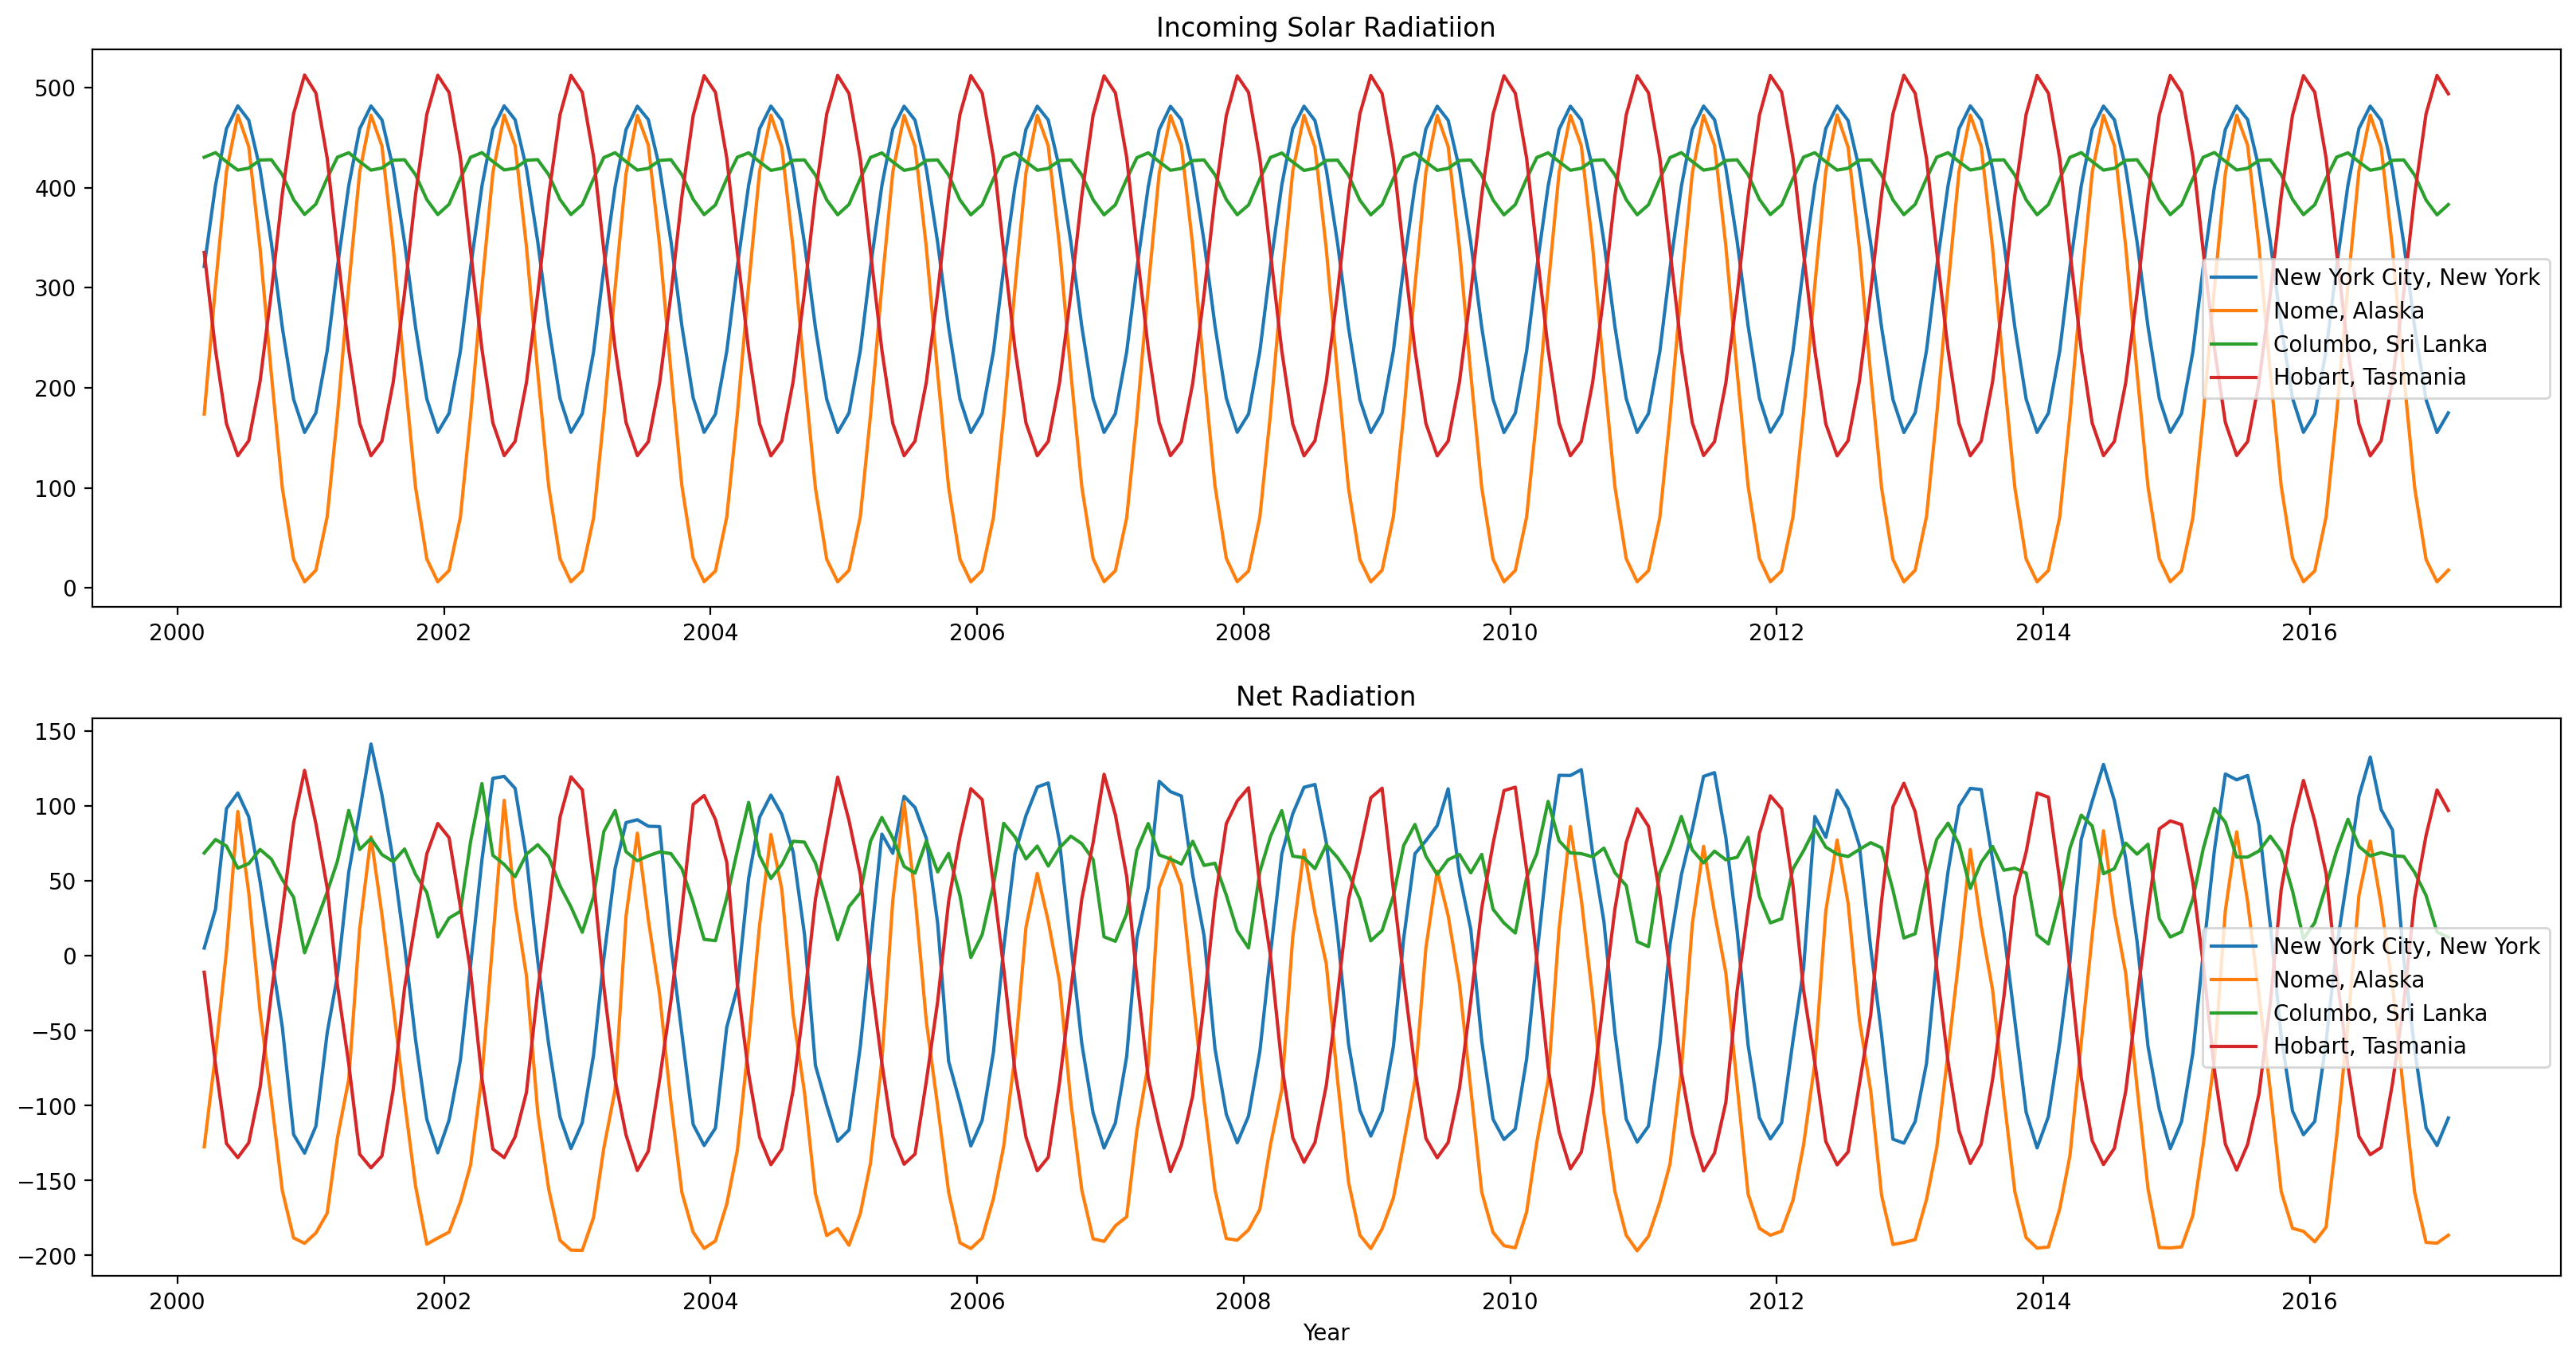

In [45]:
#Plotting Incoming Solar Radiation and Net radiation
fig, ax = plt.subplots (figsize = [20, 10], nrows = 2)
for i in merged.city:
    ax[0].plot(merged.sel(city = i).time, merged.sel(city = i).solar_mon, label = i.values) #incoming solar radiation
    ax[0].legend(loc = 'right')
    ax[0].set_title('Incoming Solar Radiatiion')
    #ax[0].set_xlim([2000-1-12, 2018-1-12])
    ax[1].plot(merged.sel(city = i).time, merged.sel(city = i).toa_net_all_mon, label = i.values) #net radiation
    ax[1].legend(loc = 'right')
    ax[1].set_xlabel('Year')
    ax[1].set_title('Net Radiation')
plt.show()